In [1]:
import pandas as pd
df=pd.read_csv("data.txt")
print(df)

           date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv     wip  over_t

In [2]:
print(df.shape)
print(df.describe())

(1197, 15)
              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.0000

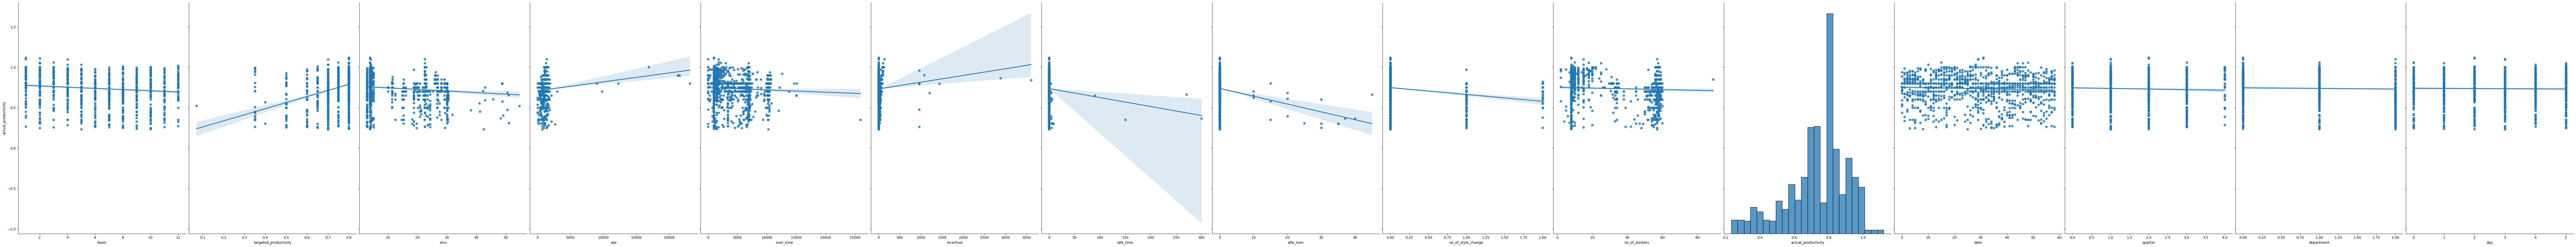

In [3]:
import seaborn as sb

texto_df=df.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder
pcaData_encoded = texto_df.copy()
label_encoders = {}
for column in texto_df.columns:
    le = LabelEncoder()
    pcaData_encoded[column] = le.fit_transform(texto_df[column])
    label_encoders[column] = le
data = pd.concat([df.drop(columns=texto_df.columns), pcaData_encoded], axis=1)

sb.pairplot(data, y_vars='actual_productivity', height=10, aspect=0.7, kind='reg')

                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   
actual_productivity   -0.148753               0.421594 -0.122089  0.131147   
date                   0.000077              -0.025333  0.003603

<Axes: >

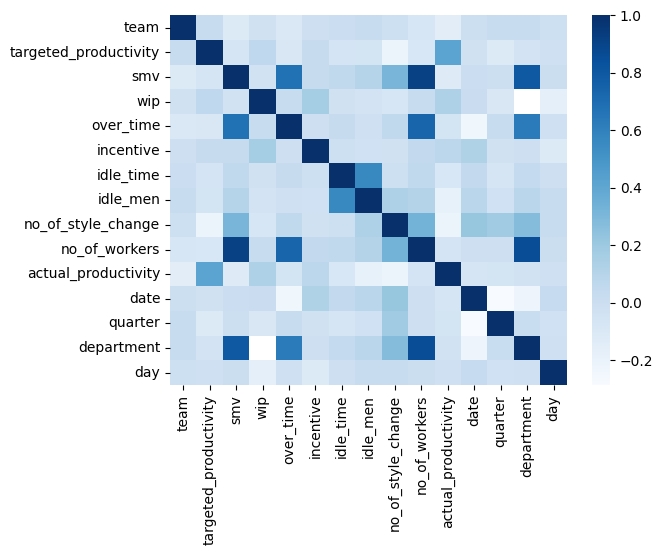

In [4]:
corr = data.corr()
print(corr)
sb.heatmap(corr, cmap="Blues")